In [38]:
!pip install yfinance

In [39]:
import pandas as pd


In [40]:
tickers_list=['AAPL','WMT','IBM','MU','BA','FB','AMZN','NFLX','GOOG','MSFT']
#Fetch data
import yfinance as yf
data=yf.download(tickers_list,start='2020-1-1',end='2021-1-1')['Adj Close']
#print 5 rows of data
print(data.head(10))

[*********************100%***********************]  10 of 10 completed
                 AAPL         AMZN  ...        NFLX         WMT
Date                                ...                        
2020-01-02  74.207466  1898.010010  ...  329.809998  116.044952
2020-01-03  73.486023  1874.969971  ...  325.899994  115.020508
2020-01-06  74.071579  1902.880005  ...  335.829987  114.786362
2020-01-07  73.723213  1906.859985  ...  330.750000  113.722878
2020-01-08  74.909149  1891.969971  ...  339.260010  113.332619
2020-01-09  76.500275  1901.050049  ...  335.660004  114.503403
2020-01-10  76.673225  1883.160034  ...  329.049988  113.547264
2020-01-13  78.311295  1891.300049  ...  338.920013  113.059433
2020-01-14  77.253838  1869.439941  ...  338.690002  113.352127
2020-01-15  76.922775  1862.020020  ...  339.070007  112.474037

[10 rows x 10 columns]


**Estimate Daily Log Returns**

In [41]:
import numpy as np
returns=np.log(data).diff()
returns.head()

,AAPL,AMZN,BA,FB,GOOG,IBM,MSFT,MU,NFLX,WMT
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.012213,-0.001681,-0.005305,-0.004919,-0.008007,-0.012530,-0.015648,-0.011926,-0.008867
2020-01-06,0.007937,0.014776,0.002941,0.018658,0.024358,-0.001788,0.002582,-0.017762,0.030014,-0.002038
2020-01-07,-0.004714,0.002089,0.010551,0.002161,-0.000624,0.000671,-0.009160,0.084098,-0.015242,-0.009308
2020-01-08,0.015958,-0.007839,-0.017678,0.010087,0.007849,0.008312,0.015803,-0.012955,0.025404,-0.003438


**Output Variance Covariance Matrix**

In [42]:
#Generate Variance Covariance Matrix
cov_matrix=returns.cov()
cov_matrix

,AAPL,AMZN,BA,FB,GOOG,IBM,MSFT,MU,NFLX,WMT
AAPL,0.000866,0.000501,0.000784,0.000660,0.000541,0.000443,0.000689,0.000634,0.000489,0.000313
AMZN,0.000501,0.000586,0.000328,0.000482,0.000401,0.000263,0.000498,0.000408,0.000482,0.000214
BA,0.000784,0.000328,0.003063,0.000649,0.000692,0.000930,0.000737,0.001217,0.000355,0.000203
FB,0.000660,0.000482,0.000649,0.000844,0.000568,0.000382,0.000620,0.000599,0.000494,0.000229
GOOG,0.000541,0.000401,0.000692,0.000568,0.000587,0.000416,0.000575,0.000594,0.000379,0.000230
IBM,0.000443,0.000263,0.000930,0.000382,0.000416,0.000672,0.000463,0.000650,0.000235,0.000229
MSFT,0.000689,0.000498,0.000737,0.000620,0.000575,0.000463,0.000770,0.000690,0.000491,0.000323
MU,0.000634,0.000408,0.001217,0.000599,0.000594,0.000650,0.000690,0.001341,0.000424,0.000277
NFLX,0.000489,0.000482,0.000355,0.000494,0.000379,0.000235,0.000491,0.000424,0.000849,0.000257
WMT,0.000313,0.000214,0.000203,0.000229,0.000230,0.000229,0.000323,0.000277,0.000257,0.000387


**Calculate Mean Returns of each stock**




In [43]:
# Calculate mean returns of each stock 
avg_rets=returns.mean()
avg_rets

AAPL    0.002293
AMZN    0.002143
BA     -0.001734
FB      0.001048
GOOG    0.000983
IBM    -0.000087
MSFT    0.001334
MU      0.001212
NFLX    0.001962
WMT     0.000829
dtype: float64

**Visualize Daily Return** 

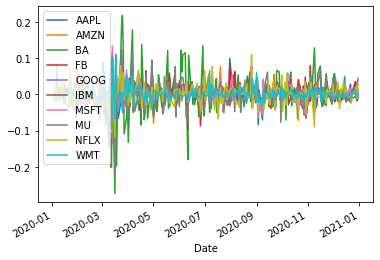

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot returns
returns.plot()
plt.show()

**Better Visualization**

No handles with labels found to put in legend.


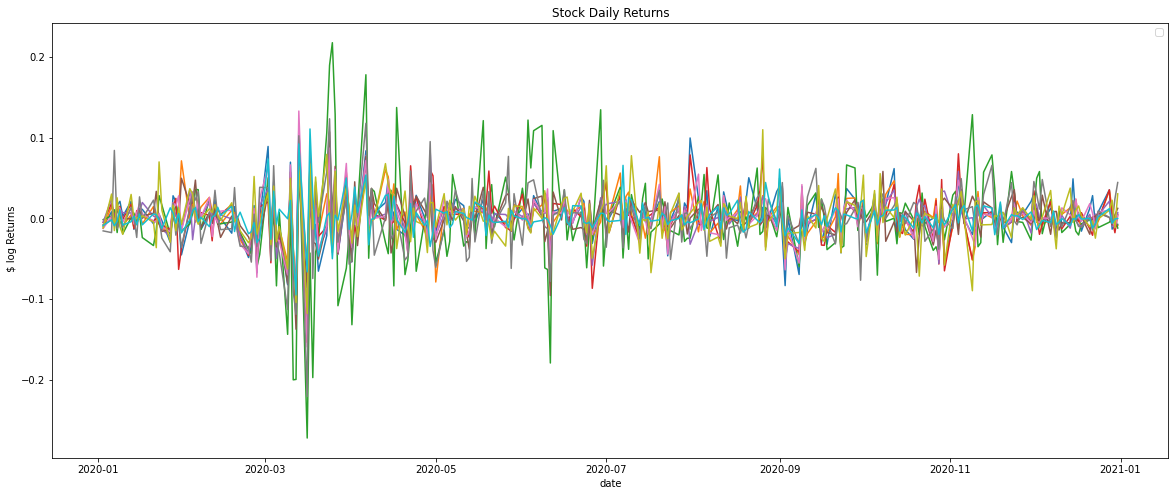

In [45]:
plt.figure(figsize=(20,8))
plt.plot(returns)
plt.xlabel('date')
plt.ylabel(' $ log Returns')
plt.title('Stock Daily Returns')
plt.legend()
plt.show()

**Find Directory**

In [46]:
!pwd

/content


**Write out a CSV file to Directory**

In [47]:
data.to_csv('StockPrices.csv',index=True)

**Activate R magic**

In [48]:
#activate R magic
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


**Print out Stock Price Data in R for inspection**

In [49]:
%%R
read.csv("StockPrices.csv")
StockPrices <- read.csv("StockPrices.csv")
StockPrices

          Date      AAPL    AMZN       BA     FB     GOOG       IBM     MSFT
1   2020-01-02  74.20747 1898.01 331.3486 209.78 1367.370 125.57217 158.5711
2   2020-01-03  73.48602 1874.97 330.7919 208.67 1360.660 124.57069 156.5966
3   2020-01-06  74.07158 1902.88 331.7661 212.60 1394.210 124.34814 157.0014
4   2020-01-07  73.72321 1906.86 335.2852 213.06 1393.340 124.43161 155.5699
5   2020-01-08  74.90915 1891.97 329.4101 215.22 1404.320 125.47015 158.0478
6   2020-01-09  76.50027 1901.05 334.3507 218.30 1419.830 126.79618 160.0223
7   2020-01-10  76.67323 1883.16 327.9687 218.06 1429.730 126.74980 159.2819
8   2020-01-13  78.31129 1891.30 328.2669 221.91 1439.230 126.66636 161.1971
9   2020-01-14  77.25384 1869.44 330.3843 219.06 1430.880 125.94307 160.0618
10  2020-01-15  76.92278 1862.02 327.8494 221.15 1439.200 126.68489 161.0984
11  2020-01-16  77.88634 1877.94 330.0364 221.77 1451.700 127.94598 164.0503
12  2020-01-17  78.74862 1864.72 322.2328 222.14 1480.390 128.25200 164.9684

**Estimate the Daily Returns in R for a single Stock Apple**

In [52]:
%%R
# tickers_list = ['AAPL','WMT','IBM','MU','BA','FB','AMZN','NFLX','GOOG','MSFT']
StockPrices$AAPL

AAPLr <- diff(log(StockPrices$AAPL),1)
AAPLr

  [1] -9.769543e-03  7.936685e-03 -4.714191e-03  1.595832e-02  2.101830e-02
  [6]  2.258234e-03  2.113927e-02 -1.359525e-02 -4.294592e-03  1.244855e-02
 [11]  1.101019e-02 -6.799929e-03  3.563167e-03  4.804261e-03 -2.886072e-03
 [16] -2.984631e-02  2.789663e-02  2.071616e-02 -1.450104e-03 -4.535174e-02
 [21] -2.750018e-03  3.248037e-02  8.121210e-03  1.162915e-02 -1.368586e-02
 [26]  4.738269e-03 -6.051648e-03  2.347024e-02 -7.146626e-03  2.463296e-04
 [31] -1.848024e-02  1.437879e-02 -1.031185e-02 -2.289534e-02 -4.866557e-02
 [36] -3.445899e-02  1.573915e-02 -6.760257e-02 -5.851679e-04  8.901834e-02
 [41] -3.227467e-02  4.534100e-02 -3.297480e-02 -1.336888e-02 -8.239537e-02
 [46]  6.954627e-02 -3.534797e-02 -1.039778e-01  1.131574e-01 -1.377081e-01
 [51]  4.303090e-02 -2.478457e-02 -7.691634e-03 -6.559022e-02 -2.147306e-02
 [56]  9.560598e-02 -5.524077e-03  5.128518e-02 -4.228378e-02  2.813831e-02
 [61] -2.042807e-03 -5.405184e-02  1.654898e-02 -1.447565e-02  8.363991e-02
 [66] -1.164

In [53]:
%%R
# tickers_list = ['AAPL','WMT','IBM','MU','BA','FB','AMZN','NFLX','GOOG','MSFT']

NULL


**Estimate Daily Returns in R for all stocks**

In [54]:
%%R
WMTr <- diff(log(StockPrices$WMT),1)
IBMr <- diff(log(StockPrices$IBM),1)
MUr <- diff(log(StockPrices$MU),1)
BAr <- diff(log(StockPrices$BA),1)
FBr <- diff(log(StockPrices$FB),1)
AMZNr <- diff(log(StockPrices$AMZN),1)
NFLXr <- diff(log(StockPrices$NFLX),1)
GOOGr <- diff(log(StockPrices$GOOG),1)
MSFTr <- diff(log(StockPrices$MSFT),1)

**Manually order Alphabetically**

In [55]:
%%R
#Ordered Alphabetically
portfolio.r <- data.frame(AAPLr,AMZNr,BAr,FBr,GOOGr,IBMr,MUr,MSFTr,NFLXr,WMTr)

portfolio.r
cov(portfolio.r)

             AAPLr        AMZNr          BAr          FBr        GOOGr
AAPLr 0.0008663695 0.0005005949 0.0007837456 0.0006596968 0.0005407379
AMZNr 0.0005005949 0.0005855236 0.0003280507 0.0004818653 0.0004007755
BAr   0.0007837456 0.0003280507 0.0030629755 0.0006494560 0.0006922110
FBr   0.0006596968 0.0004818653 0.0006494560 0.0008438704 0.0005676559
GOOGr 0.0005407379 0.0004007755 0.0006922110 0.0005676559 0.0005868444
IBMr  0.0004432672 0.0002631123 0.0009297024 0.0003821303 0.0004155247
MUr   0.0006336234 0.0004080046 0.0012172389 0.0005985294 0.0005941126
MSFTr 0.0006892408 0.0004977014 0.0007367113 0.0006204228 0.0005753804
NFLXr 0.0004893803 0.0004820469 0.0003550549 0.0004944685 0.0003790099
WMTr  0.0003132321 0.0002142314 0.0002033478 0.0002292058 0.0002304932
              IBMr          MUr        MSFTr        NFLXr         WMTr
AAPLr 0.0004432672 0.0006336234 0.0006892408 0.0004893803 0.0003132321
AMZNr 0.0002631123 0.0004080046 0.0004977014 0.0004820469 0.0002142314
BAr   